Loading health and nutrition datasets...
✅ All datasets loaded successfully!
Sugar data shape: (2370, 3)
Bad teeth data shape: (188, 3)
BMI men data shape: (8022, 3)
BMI women data shape: (8022, 3)
Cholesterol men data shape: (7449, 3)
Cholesterol women data shape: (7449, 3)
🍭 TOP 20 COUNTRIES BY AVERAGE SUGAR CONSUMPTION
 1. Luxembourg                 442.6 g/day
 2. Fiji                       433.4 g/day
 3. Montenegro                 330.5 g/day
 4. Australia                  313.5 g/day
 5. Nauru                      284.1 g/day
 6. Macao, China               256.2 g/day
 7. Lithuania                  249.8 g/day
 8. Bolivia                    236.7 g/day
 9. Ireland                    228.0 g/day
10. Malta                      226.3 g/day
11. Ecuador                    223.0 g/day
12. Iceland                    215.8 g/day
13. Canada                     210.0 g/day
14. St. Kitts and Nevis        206.3 g/day
15. Lebanon                    205.0 g/day
16. Russia                     

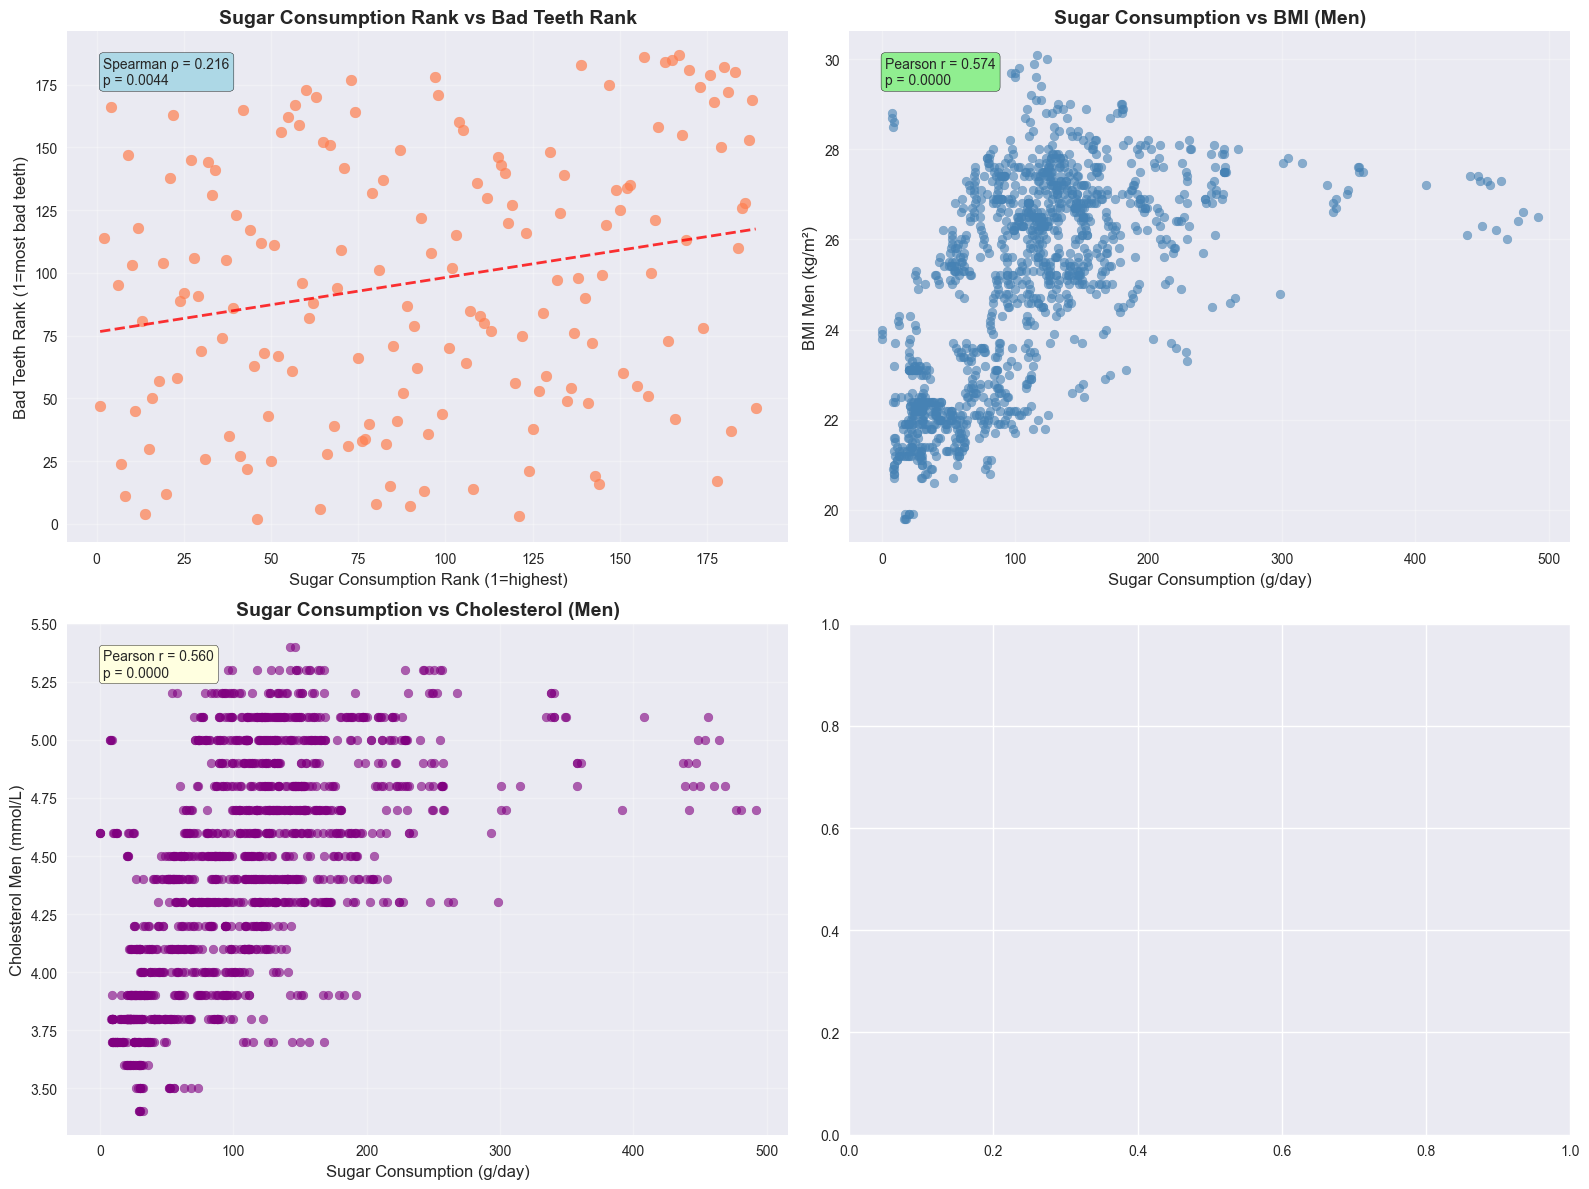


📋 SUMMARY OF ALL CORRELATIONS
Comparison                     Pearson r  p-val    Spearman ρ   p-val    N      Sig? 
--------------------------------------------------------------------------------
Sugar Rank vs Bad Teeth Rank     0.221   0.0035    0.216     0.0044   173  ✓/✓
Sugar vs BMI (Men)               0.574   0.0000    0.651     0.0000  1223  ✓/✓
Sugar vs BMI (Women)             0.506   0.0000    0.634     0.0000  1223  ✓/✓
Sugar vs Cholesterol (Men)       0.560   0.0000    0.630     0.0000  1573  ✓/✓
Sugar vs Cholesterol (Women)     0.554   0.0000    0.640     0.0000  1573  ✓/✓

🎯 KEY FINDINGS AND INTERPRETATION

1️⃣ SUGAR CONSUMPTION PATTERNS:
   • Highest consumers: Luxembourg, Fiji, Montenegro
   • Global average: 111.4 g/day
   • Range: 7.7 - 442.6 g/day

2️⃣ BAD TEETH PATTERNS:
   • Worst dental health: Martinique, St. Lucia, Saudi Arabia
   • Global average: 2.12 bad teeth per child

3️⃣ RANKING CORRELATIONS:
   • Sugar vs Bad Teeth Rankings: weak positive correlation (si

In [5]:
# Sugar Consumption vs Health Indicators Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Loading health and nutrition datasets...")

# Load all required datasets
try:
    # Sugar consumption
    sugar_df = pd.read_csv('dataset/ddf--datapoints--sugar_per_person_g_per_day--by--geo--time.csv')
    
    # Bad teeth
    bad_teeth_df = pd.read_csv('dataset/ddf--datapoints--bad_teeth_per_child_12_yr--by--geo--time.csv')
    
    # BMI data
    bmi_men_df = pd.read_csv('dataset/ddf--datapoints--body_mass_index_bmi_men_kgperm2--by--geo--time.csv')
    bmi_women_df = pd.read_csv('dataset/ddf--datapoints--body_mass_index_bmi_women_kgperm2--by--geo--time.csv')
    
    # Cholesterol data (as proxy for cardiovascular health)
    cholesterol_men_df = pd.read_csv('dataset/ddf--datapoints--cholesterol_fat_in_blood_men_mmolperl--by--geo--time.csv')
    cholesterol_women_df = pd.read_csv('dataset/ddf--datapoints--cholesterol_fat_in_blood_women_mmolperl--by--geo--time.csv')
    
    # Country names for better display
    entities_df = pd.read_csv('dataset/ddf--entities--geo--country.csv')
    
    print("✅ All datasets loaded successfully!")
    print(f"Sugar data shape: {sugar_df.shape}")
    print(f"Bad teeth data shape: {bad_teeth_df.shape}")
    print(f"BMI men data shape: {bmi_men_df.shape}")
    print(f"BMI women data shape: {bmi_women_df.shape}")
    print(f"Cholesterol men data shape: {cholesterol_men_df.shape}")
    print(f"Cholesterol women data shape: {cholesterol_women_df.shape}")
    
except FileNotFoundError as e:
    print(f"❌ Error loading files: {e}")
    print("Please ensure all CSV files are in the 'dataset' directory")

# 1. SUGAR CONSUMPTION RANKING BY COUNTRY

def calculate_country_averages(df, value_col, name):
    """Calculate average values per country across all available years"""
    country_avg = df.groupby('geo')[value_col].mean().reset_index()
    country_avg.columns = ['geo', f'avg_{name}']
    country_avg = country_avg.sort_values(f'avg_{name}', ascending=False).reset_index(drop=True)
    country_avg[f'{name}_rank'] = range(1, len(country_avg) + 1)
    return country_avg

# Calculate sugar consumption ranking
sugar_ranking = calculate_country_averages(sugar_df, 'sugar_per_person_g_per_day', 'sugar')

# Add country names
country_names = entities_df[['country', 'name']].rename(columns={'country': 'geo'})
sugar_ranking = sugar_ranking.merge(country_names, on='geo', how='left')

print("🍭 TOP 20 COUNTRIES BY AVERAGE SUGAR CONSUMPTION")
print("=" * 60)
top_20_sugar = sugar_ranking.head(20)
for idx, row in top_20_sugar.iterrows():
    country_name = row['name'] if pd.notna(row['name']) else row['geo'].upper()
    print(f"{row['sugar_rank']:2d}. {country_name:<25} {row['avg_sugar']:6.1f} g/day")

print(f"\n📊 Total countries with sugar data: {len(sugar_ranking)}")
print(f"📊 Average global sugar consumption: {sugar_ranking['avg_sugar'].mean():.1f} g/day")
print(f"📊 Highest consumption: {sugar_ranking['avg_sugar'].max():.1f} g/day")
print(f"📊 Lowest consumption: {sugar_ranking['avg_sugar'].min():.1f} g/day")

# 2. BAD TEETH RANKING BY COUNTRY

# Calculate bad teeth ranking
bad_teeth_ranking = calculate_country_averages(bad_teeth_df, 'bad_teeth_per_child_12_yr', 'bad_teeth')

# Add country names
bad_teeth_ranking = bad_teeth_ranking.merge(country_names, on='geo', how='left')

print("🦷 TOP 20 COUNTRIES BY AVERAGE BAD TEETH PER CHILD (12 years old)")
print("=" * 65)
top_20_teeth = bad_teeth_ranking.head(20)
for idx, row in top_20_teeth.iterrows():
    country_name = row['name'] if pd.notna(row['name']) else row['geo'].upper()
    print(f"{row['bad_teeth_rank']:2d}. {country_name:<25} {row['avg_bad_teeth']:6.2f} bad teeth/child")

print(f"\n📊 Total countries with bad teeth data: {len(bad_teeth_ranking)}")
print(f"📊 Average global bad teeth per child: {bad_teeth_ranking['avg_bad_teeth'].mean():.2f}")
print(f"📊 Highest bad teeth rate: {bad_teeth_ranking['avg_bad_teeth'].max():.2f}")
print(f"📊 Lowest bad teeth rate: {bad_teeth_ranking['avg_bad_teeth'].min():.2f}")

# 3. COMPARE SUGAR CONSUMPTION VS BAD TEETH RANKINGS

# Merge the rankings
ranking_comparison = sugar_ranking.merge(
    bad_teeth_ranking[['geo', 'avg_bad_teeth', 'bad_teeth_rank']], 
    on='geo', 
    how='inner'
)

print(f"🔍 SUGAR CONSUMPTION vs BAD TEETH RANKING COMPARISON")
print(f"📊 Countries with both datasets: {len(ranking_comparison)}")
print("=" * 80)

# Calculate rank differences
ranking_comparison['rank_difference'] = ranking_comparison['sugar_rank'] - ranking_comparison['bad_teeth_rank']
ranking_comparison['abs_rank_diff'] = abs(ranking_comparison['rank_difference'])

# Sort by sugar ranking for display
comparison_display = ranking_comparison.sort_values('sugar_rank').head(15)

print(f"{'Rank':<4} {'Country':<25} {'Sugar Rank':<11} {'Teeth Rank':<11} {'Difference':<10}")
print("-" * 80)
for idx, row in comparison_display.iterrows():
    country_name = row['name'] if pd.notna(row['name']) else row['geo'].upper()
    diff_str = f"{row['rank_difference']:+d}"
    print(f"{row['sugar_rank']:2d}.  {country_name:<25} {row['sugar_rank']:^11d} {row['bad_teeth_rank']:^11d} {diff_str:^10}")

# Calculate rank correlation
rank_correlation_pearson = pearsonr(ranking_comparison['sugar_rank'], ranking_comparison['bad_teeth_rank'])
rank_correlation_spearman = spearmanr(ranking_comparison['sugar_rank'], ranking_comparison['bad_teeth_rank'])

print(f"\n📈 RANK CORRELATION ANALYSIS:")
print(f"Pearson correlation:  {rank_correlation_pearson[0]:.4f} (p-value: {rank_correlation_pearson[1]:.4f})")
print(f"Spearman correlation: {rank_correlation_spearman[0]:.4f} (p-value: {rank_correlation_spearman[1]:.4f})")

if rank_correlation_spearman[1] < 0.05:
    print("✅ Correlation is statistically significant (p < 0.05)")
else:
    print("❌ Correlation is not statistically significant (p >= 0.05)")

# 4. CORRELATION ANALYSIS: SUGAR vs HEALTH INDICATORS

def merge_and_correlate(df1, df2, val1_col, val2_col, name1, name2):
    """Merge two datasets and calculate correlation"""
    # Merge on geo and time
    merged = df1.merge(df2, on=['geo', 'time'], how='inner')
    
    # Remove missing values
    merged_clean = merged.dropna(subset=[val1_col, val2_col])
    
    if len(merged_clean) < 10:
        return None, None, None, 0
    
    # Calculate correlations
    pearson_corr = pearsonr(merged_clean[val1_col], merged_clean[val2_col])
    spearman_corr = spearmanr(merged_clean[val1_col], merged_clean[val2_col])
    
    return merged_clean, pearson_corr, spearman_corr, len(merged_clean)

print("🔬 CORRELATION ANALYSIS: SUGAR CONSUMPTION vs HEALTH INDICATORS")
print("=" * 70)

# Sugar vs BMI Men
merged_bmi_men, pearson_bmi_men, spearman_bmi_men, n_bmi_men = merge_and_correlate(
    sugar_df, bmi_men_df, 
    'sugar_per_person_g_per_day', 'body_mass_index_bmi_men_kgperm2',
    'Sugar', 'BMI Men'
)

print(f"\n1️⃣ SUGAR CONSUMPTION vs BMI (MEN)")
print(f"   Data points: {n_bmi_men}")
if pearson_bmi_men:
    print(f"   Pearson correlation:  {pearson_bmi_men[0]:7.4f} (p = {pearson_bmi_men[1]:.4f})")
    print(f"   Spearman correlation: {spearman_bmi_men[0]:7.4f} (p = {spearman_bmi_men[1]:.4f})")

# Sugar vs BMI Women
merged_bmi_women, pearson_bmi_women, spearman_bmi_women, n_bmi_women = merge_and_correlate(
    sugar_df, bmi_women_df, 
    'sugar_per_person_g_per_day', 'body_mass_index_bmi_women_kgperm2',
    'Sugar', 'BMI Women'
)

print(f"\n2️⃣ SUGAR CONSUMPTION vs BMI (WOMEN)")
print(f"   Data points: {n_bmi_women}")
if pearson_bmi_women:
    print(f"   Pearson correlation:  {pearson_bmi_women[0]:7.4f} (p = {pearson_bmi_women[1]:.4f})")
    print(f"   Spearman correlation: {spearman_bmi_women[0]:7.4f} (p = {spearman_bmi_women[1]:.4f})")

# Sugar vs Cholesterol Men
merged_chol_men, pearson_chol_men, spearman_chol_men, n_chol_men = merge_and_correlate(
    sugar_df, cholesterol_men_df, 
    'sugar_per_person_g_per_day', 'cholesterol_fat_in_blood_men_mmolperl',
    'Sugar', 'Cholesterol Men'
)

print(f"\n3️⃣ SUGAR CONSUMPTION vs CHOLESTEROL (MEN)")
print(f"   Data points: {n_chol_men}")
if pearson_chol_men:
    print(f"   Pearson correlation:  {pearson_chol_men[0]:7.4f} (p = {pearson_chol_men[1]:.4f})")
    print(f"   Spearman correlation: {spearman_chol_men[0]:7.4f} (p = {spearman_chol_men[1]:.4f})")

# Sugar vs Cholesterol Women
merged_chol_women, pearson_chol_women, spearman_chol_women, n_chol_women = merge_and_correlate(
    sugar_df, cholesterol_women_df, 
    'sugar_per_person_g_per_day', 'cholesterol_fat_in_blood_women_mmolperl',
    'Sugar', 'Cholesterol Women'
)

print(f"\n4️⃣ SUGAR CONSUMPTION vs CHOLESTEROL (WOMEN)")
print(f"   Data points: {n_chol_women}")
if pearson_chol_women:
    print(f"   Pearson correlation:  {pearson_chol_women[0]:7.4f} (p = {pearson_chol_women[1]:.4f})")
    print(f"   Spearman correlation: {spearman_chol_women[0]:7.4f} (p = {spearman_chol_women[1]:.4f})")

# Sugar vs Bad Teeth (using individual data points, not ranks)
merged_teeth, pearson_teeth, spearman_teeth, n_teeth = merge_and_correlate(
    sugar_df, bad_teeth_df, 
    'sugar_per_person_g_per_day', 'bad_teeth_per_child_12_yr',
    'Sugar', 'Bad Teeth'
)

print(f"\n5️⃣ SUGAR CONSUMPTION vs BAD TEETH PER CHILD")
print(f"   Data points: {n_teeth}")
if pearson_teeth:
    print(f"   Pearson correlation:  {pearson_teeth[0]:7.4f} (p = {pearson_teeth[1]:.4f})")
    print(f"   Spearman correlation: {spearman_teeth[0]:7.4f} (p = {spearman_teeth[1]:.4f})")

# 5. VISUALIZATION: RANKING COMPARISON

# Create ranking comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Sugar consumption ranking vs Bad teeth ranking
if len(ranking_comparison) > 0:
    ax1 = axes[0, 0]
    ax1.scatter(ranking_comparison['sugar_rank'], ranking_comparison['bad_teeth_rank'], 
               alpha=0.7, s=60, color='coral')
    
    # Add trend line
    z = np.polyfit(ranking_comparison['sugar_rank'], ranking_comparison['bad_teeth_rank'], 1)
    p = np.poly1d(z)
    ax1.plot(ranking_comparison['sugar_rank'], p(ranking_comparison['sugar_rank']), 
             "r--", linewidth=2, alpha=0.8)
    
    ax1.set_xlabel('Sugar Consumption Rank (1=highest)', fontsize=12)
    ax1.set_ylabel('Bad Teeth Rank (1=most bad teeth)', fontsize=12)
    ax1.set_title('Sugar Consumption Rank vs Bad Teeth Rank', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Add correlation text
    corr_text = f"Spearman ρ = {rank_correlation_spearman[0]:.3f}\np = {rank_correlation_spearman[1]:.4f}"
    ax1.text(0.05, 0.95, corr_text, transform=ax1.transAxes, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"), 
             verticalalignment='top')

# Plot 2: Sugar vs BMI scatter
if merged_bmi_men is not None and len(merged_bmi_men) > 0:
    ax2 = axes[0, 1]
    ax2.scatter(merged_bmi_men['sugar_per_person_g_per_day'], 
               merged_bmi_men['body_mass_index_bmi_men_kgperm2'], 
               alpha=0.6, s=40, color='steelblue')
    
    ax2.set_xlabel('Sugar Consumption (g/day)', fontsize=12)
    ax2.set_ylabel('BMI Men (kg/m²)', fontsize=12)
    ax2.set_title('Sugar Consumption vs BMI (Men)', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    if pearson_bmi_men:
        corr_text = f"Pearson r = {pearson_bmi_men[0]:.3f}\np = {pearson_bmi_men[1]:.4f}"
        ax2.text(0.05, 0.95, corr_text, transform=ax2.transAxes, 
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"), 
                 verticalalignment='top')

# Plot 3: Sugar vs Cholesterol scatter
if merged_chol_men is not None and len(merged_chol_men) > 0:
    ax3 = axes[1, 0]
    ax3.scatter(merged_chol_men['sugar_per_person_g_per_day'], 
               merged_chol_men['cholesterol_fat_in_blood_men_mmolperl'], 
               alpha=0.6, s=40, color='purple')
    
    ax3.set_xlabel('Sugar Consumption (g/day)', fontsize=12)
    ax3.set_ylabel('Cholesterol Men (mmol/L)', fontsize=12)
    ax3.set_title('Sugar Consumption vs Cholesterol (Men)', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    if pearson_chol_men:
        corr_text = f"Pearson r = {pearson_chol_men[0]:.3f}\np = {pearson_chol_men[1]:.4f}"
        ax3.text(0.05, 0.95, corr_text, transform=ax3.transAxes, 
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"), 
                 verticalalignment='top')

# Plot 4: Sugar vs Bad Teeth scatter
if merged_teeth is not None and len(merged_teeth) > 0:
    ax4 = axes[1, 1]
    ax4.scatter(merged_teeth['sugar_per_person_g_per_day'], 
               merged_teeth['bad_teeth_per_child_12_yr'], 
               alpha=0.6, s=40, color='orange')
    
    ax4.set_xlabel('Sugar Consumption (g/day)', fontsize=12)
    ax4.set_ylabel('Bad Teeth per Child (12yr)', fontsize=12)
    ax4.set_title('Sugar Consumption vs Bad Teeth', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    
    if pearson_teeth:
        corr_text = f"Pearson r = {pearson_teeth[0]:.3f}\np = {pearson_teeth[1]:.4f}"
        ax4.text(0.05, 0.95, corr_text, transform=ax4.transAxes, 
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="lightpink"),
                 verticalalignment='top')

plt.tight_layout()
plt.show()

# 6. SUMMARY CORRELATION TABLE

print("\n📋 SUMMARY OF ALL CORRELATIONS")
print("=" * 80)

correlations_summary = []

# Ranking correlation
correlations_summary.append({
    'Comparison': 'Sugar Rank vs Bad Teeth Rank',
    'Pearson_r': rank_correlation_pearson[0],
    'Pearson_p': rank_correlation_pearson[1],
    'Spearman_r': rank_correlation_spearman[0],
    'Spearman_p': rank_correlation_spearman[1],
    'N_observations': len(ranking_comparison),
    'Interpretation': 'Rankings comparison'
})

# Value correlations
if pearson_bmi_men:
    correlations_summary.append({
        'Comparison': 'Sugar vs BMI (Men)',
        'Pearson_r': pearson_bmi_men[0],
        'Pearson_p': pearson_bmi_men[1],
        'Spearman_r': spearman_bmi_men[0],
        'Spearman_p': spearman_bmi_men[1],
        'N_observations': n_bmi_men,
        'Interpretation': 'Direct values'
    })

if pearson_bmi_women:
    correlations_summary.append({
        'Comparison': 'Sugar vs BMI (Women)',
        'Pearson_r': pearson_bmi_women[0],
        'Pearson_p': pearson_bmi_women[1],
        'Spearman_r': spearman_bmi_women[0],
        'Spearman_p': spearman_bmi_women[1],
        'N_observations': n_bmi_women,
        'Interpretation': 'Direct values'
    })

if pearson_chol_men:
    correlations_summary.append({
        'Comparison': 'Sugar vs Cholesterol (Men)',
        'Pearson_r': pearson_chol_men[0],
        'Pearson_p': pearson_chol_men[1],
        'Spearman_r': spearman_chol_men[0],
        'Spearman_p': spearman_chol_men[1],
        'N_observations': n_chol_men,
        'Interpretation': 'Direct values'
    })

if pearson_chol_women:
    correlations_summary.append({
        'Comparison': 'Sugar vs Cholesterol (Women)',
        'Pearson_r': pearson_chol_women[0],
        'Pearson_p': pearson_chol_women[1],
        'Spearman_r': spearman_chol_women[0],
        'Spearman_p': spearman_chol_women[1],
        'N_observations': n_chol_women,
        'Interpretation': 'Direct values'
    })

if pearson_teeth:
    correlations_summary.append({
        'Comparison': 'Sugar vs Bad Teeth',
        'Pearson_r': pearson_teeth[0],
        'Pearson_p': pearson_teeth[1],
        'Spearman_r': spearman_teeth[0],
        'Spearman_p': spearman_teeth[1],
        'N_observations': n_teeth,
        'Interpretation': 'Direct values'
    })

# Create summary dataframe
summary_df = pd.DataFrame(correlations_summary)

# Display formatted table
print(f"{'Comparison':<30} {'Pearson r':<10} {'p-val':<8} {'Spearman ρ':<12} {'p-val':<8} {'N':<6} {'Sig?':<5}")
print("-" * 80)

for _, row in summary_df.iterrows():
    significant_p = "✓" if row['Pearson_p'] < 0.05 else "✗"
    significant_s = "✓" if row['Spearman_p'] < 0.05 else "✗"
    
    print(f"{row['Comparison']:<30} "
          f"{row['Pearson_r']:7.3f}   "
          f"{row['Pearson_p']:6.4f}  "
          f"{row['Spearman_r']:7.3f}     "
          f"{row['Spearman_p']:6.4f}  "
          f"{row['N_observations']:4d}  "
          f"{significant_p}/{significant_s}")

# 7. KEY FINDINGS AND INTERPRETATION

print("\n🎯 KEY FINDINGS AND INTERPRETATION")
print("=" * 60)

print("\n1️⃣ SUGAR CONSUMPTION PATTERNS:")
if len(sugar_ranking) > 0:
    top_sugar_countries = sugar_ranking.head(5)['name'].fillna(sugar_ranking.head(5)['geo'].str.upper()).tolist()
    print(f"   • Highest consumers: {', '.join(top_sugar_countries[:3])}")
    print(f"   • Global average: {sugar_ranking['avg_sugar'].mean():.1f} g/day")
    print(f"   • Range: {sugar_ranking['avg_sugar'].min():.1f} - {sugar_ranking['avg_sugar'].max():.1f} g/day")

print("\n2️⃣ BAD TEETH PATTERNS:")
if len(bad_teeth_ranking) > 0:
    worst_teeth_countries = bad_teeth_ranking.head(3)['name'].fillna(bad_teeth_ranking.head(3)['geo'].str.upper()).tolist()
    print(f"   • Worst dental health: {', '.join(worst_teeth_countries)}")
    print(f"   • Global average: {bad_teeth_ranking['avg_bad_teeth'].mean():.2f} bad teeth per child")

print("\n3️⃣ RANKING CORRELATIONS:")
if 'rank_correlation_spearman' in locals():
    strength = "strong" if abs(rank_correlation_spearman[0]) > 0.5 else "moderate" if abs(rank_correlation_spearman[0]) > 0.3 else "weak"
    direction = "positive" if rank_correlation_spearman[0] > 0 else "negative"
    significance = "significant" if rank_correlation_spearman[1] < 0.05 else "not significant"
    
    print(f"   • Sugar vs Bad Teeth Rankings: {strength} {direction} correlation ({significance})")
    print(f"   • Countries with high sugar consumption tend to have {'high' if rank_correlation_spearman[0] > 0 else 'low'} rates of bad teeth")

print("\n4️⃣ HEALTH INDICATOR CORRELATIONS:")
correlations_found = []

for _, row in summary_df.iterrows():
    if 'vs' in row['Comparison'] and row['Interpretation'] == 'Direct values':
        strength = "strong" if abs(row['Pearson_r']) > 0.5 else "moderate" if abs(row['Pearson_r']) > 0.3 else "weak"
        direction = "positive" if row['Pearson_r'] > 0 else "negative"
        significance = "significant" if row['Pearson_p'] < 0.05 else "not significant"
        
        print(f"   • {row['Comparison']}: {strength} {direction} correlation ({significance})")
        
        if row['Pearson_p'] < 0.05:
            if 'BMI' in row['Comparison']:
                print(f"     → Higher sugar intake associated with {'higher' if row['Pearson_r'] > 0 else 'lower'} BMI")
            elif 'Cholesterol' in row['Comparison']:
                print(f"     → Higher sugar intake associated with {'higher' if row['Pearson_r'] > 0 else 'lower'} cholesterol")
            elif 'Bad Teeth' in row['Comparison']:
                print(f"     → Higher sugar intake associated with {'more' if row['Pearson_r'] > 0 else 'fewer'} bad teeth")

print("\n5️⃣ LIMITATIONS:")
print("   • Analysis based on available country-level averages")
print("   • Correlation does not imply causation")
print("   • Different countries may have different data collection periods")
print("   • Other factors (genetics, healthcare, diet composition) may influence results")

print(f"\n📊 Analysis completed with {len(summary_df)} correlation tests performed.")